In [2]:
import tensorflow as tf
from keras.api.datasets import fashion_mnist
import keras
import matplotlib.pyplot as plt
from keras import callbacks
import numpy as np

In [2]:
(train_image ,train_labels), (test_image, test_labels) = fashion_mnist.load_data()


In [3]:
print('conjunto de treino image x labels:', train_image.shape, train_labels.shape)
print('conjunto de test image x labels:', test_image.shape, test_labels.shape)
classe_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

conjunto de treino image x labels: (60000, 28, 28) (60000,)
conjunto de test image x labels: (10000, 28, 28) (10000,)


In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #formato de entrada
    keras.layers.Dense(128, activation=tf.nn.relu), # 128 mneuronios, ativação relu pois será absoluto 0 ou 1
    keras.layers.Dense(10, activation=tf.nn.softmax) # 10 classes
])

c:\Users\romario.santos\AppData\Local\anaconda3\envs\Mobia\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


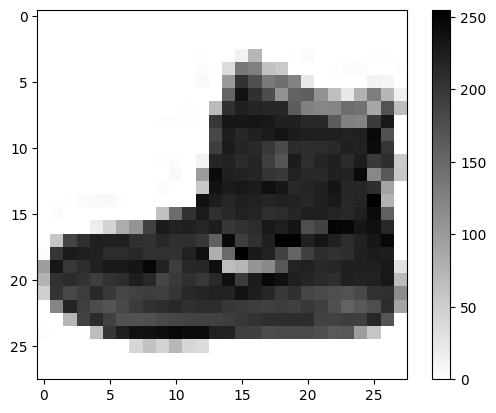

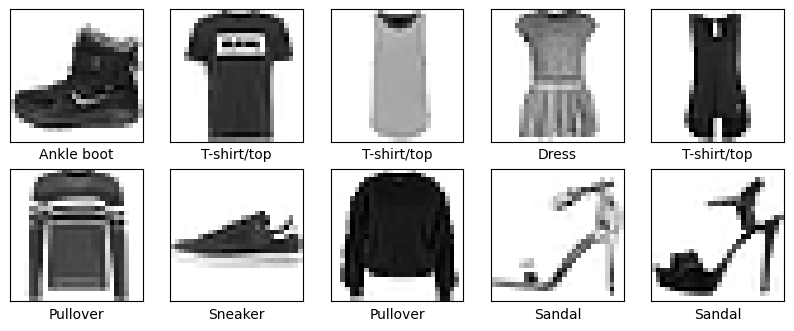

In [5]:
# Exibir a primeira imagem e informações básicas
plt.figure()
plt.imshow(train_image[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# Normalizar os dados
train_image = train_image / 255.0
test_image = test_image / 255.0

# Visualizar as primeiras 10 imagens
plt.figure(figsize=(10, 10))
for i in range(10):  # Mostra as primeiras 10 imagens
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Remove ticks do eixo x
    plt.yticks([])  # Remove ticks do eixo y
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)  # Exibe cada imagem
    plt.xlabel(classe_names[train_labels[i]])  # Mostra o rótulo correspondente
plt.show()

In [8]:
callbacks = MyCallback()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_image, train_labels, epochs=15, callbacks=[callbacks])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7769 - loss: 0.6439
Epoch 2/15
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8588 - loss: 0.3882loss é baixo cancelando treino
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8588 - loss: 0.3882


In [7]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.4):
            print("loss é baixo cancelando treino")
            self.model.stop_training = True

In [9]:
# predição

results = model.predict(test_image)
print(results[0])
previsto = np.argmax(results[0]) 
print("Rótulo verdadeiro: ", test_labels[0]) 
print("Rótulo previsto: ", previsto)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[5.0250719e-06 8.5789601e-08 7.6022770e-06 2.8409679e-07 2.1584117e-06
 7.9771616e-03 2.7593640e-06 4.6033915e-02 4.1550829e-04 9.4555551e-01]
Rótulo verdadeiro:  9
Rótulo previsto:  9
